# Carregando Dataset:

In [9]:
import numpy as np

paths = [
    "data/processed/CeraDePolietileno-633nm.txt",
    "data/processed/CeraDePolietileno-785nm.txt",
    "data/processed/Poliisopreno_trans_633nm.txt",
    "data/processed/Poliisopreno_trans_785nm.txt",
    "data/processed/PE_glicol_mm4000.txt",
    "data/processed/PE_glicol_mm10000.txt",
    "data/processed/PVA_altaMM.txt",
    "data/processed/PVA_mediaMM.txt",
    "data/processed/Polipropileno.txt"
]

for i, path in enumerate(paths):
    data = np.loadtxt(path, delimiter='\t')
    x_points = data[:, 1]
    if i == 0:
        x_array = np.array([x_points])
    else:
        x_array = np.vstack((x_array, x_points))

print(x_array.shape)

(9, 1600)


# Reduzindo Dimensionalidade (PCA):

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_polymers = pca.fit_transform(x_array)

print(pca_polymers)

[[-0.20555365 -1.31682965]
 [-0.44294804 -1.08383791]
 [-1.00045459 -2.65600371]
 [-0.84647436 -2.4982148 ]
 [ 4.48438048  1.35459362]
 [ 4.7054285   1.59318169]
 [-3.27949101  2.9725625 ]
 [-3.25944739  2.92885847]
 [-0.15543994 -1.29431022]]


# Plotando os vetores reduzidos dos espectros dos polímeros:

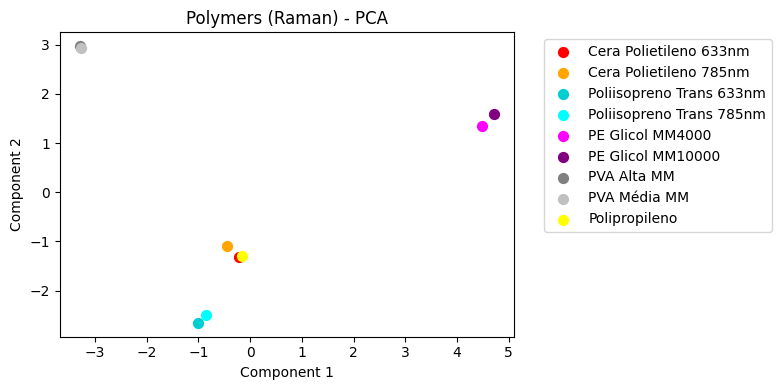

In [12]:
import matplotlib.pyplot as plt

X = pca_polymers[:, 0]
Y = pca_polymers[:, 1]

names = ["Cera Polietileno 633nm", "Cera Polietileno 785nm", "Poliisopreno Trans 633nm", "Poliisopreno Trans 785nm",
"PE Glicol MM4000", "PE Glicol MM10000", "PVA Alta MM", "PVA Média MM", "Polipropileno"]
colors = ["red", "orange", "darkturquoise", "cyan", "magenta", "purple", "gray", "silver", "yellow"]

plt.figure(figsize=(8, 4))
for xi, yi, nome, cor in zip(X, Y, names, colors):
    plt.scatter(xi, yi, color=cor, s=50, label=nome)

plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.title("Polymers (Raman) - PCA")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()